In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import interpolate

In [3]:
df = pd.read_csv('OPERATED FLIGHTS_crosstab.csv')

In [4]:
df.head()

,AIRLINE,DEPARTURE DATE,FLT_NUM,ORIG_CD,DEST_CD,SCH_DEST_CD,TAIL,FLT_TYPE,STD,STA,STATUS D00,STATUS A00,STATUS A14,OUT_DTMZ,OFF_DTMZ,ON_DTMZ,IN_DTMZ
0,CMH,8/1/2021,284,MVD,PTY,PTY,HP9909,Schedule,04:19,11:54,DELAYED,DELAYED,DELAYED,8/1/2021 07:59,8/1/2021 08:10,8/1/2021 15:12,8/1/2021 15:19
1,CMH,8/1/2021,820,POA,PTY,PTY,HP1824,Schedule,04:24,11:48,ON TIME,DELAYED,ON TIME,8/1/2021 04:23,8/1/2021 04:40,8/1/2021 11:45,8/1/2021 11:51
2,CMH,8/1/2021,276,SCL,PTY,PTY,HP1843,Schedule,04:29,11:22,DELAYED,DELAYED,DELAYED,8/1/2021 04:40,8/1/2021 05:02,8/1/2021 11:37,8/1/2021 11:40
3,CMH,8/1/2021,764,CNF,PTY,PTY,HP1831,Schedule,04:30,11:24,ON TIME,ON TIME,ON TIME,8/1/2021 04:28,8/1/2021 04:40,8/1/2021 11:07,8/1/2021 11:13
4,CMH,8/1/2021,872,GIG,PTY,PTY,HP9910,Schedule,04:37,11:52,ON TIME,ON TIME,ON TIME,8/1/2021 04:35,8/1/2021 04:51,8/1/2021 11:32,8/1/2021 11:37


<a id='indice'></a>
## Domain Knowledge Test – Operational Efficiency 
### 1.	Busque la Puntualidad de Copa en el 2018 o 2019. ¿En qué lugar quedo COPA en el año que encontró respecto a las aerolíneas del mundo?

#####    a.	¿Ese número que encontró es la salida a tiempo o la llegada a tiempo? 
[Respuesta](#Respuesta1A) 


### 2.	En base a los datos provistos realice agregaciones en base a lo siguiente:

    a.	Por semana, puntualidad a la salida y a la llegada (Status D0 es Salida a 0 a tiempo, Status A0 es Llegada a 
         tiempo y Status A14 es llegada a tiempo dentro de 14 minutos después de la hora de llegada planificada)
[Respuesta a](#Respuesta2A)
    
    b.	Por estación, puntualidad por semana (¿a la salida? ¿Y a la llegada?)
[Respuesta b](#Respuesta2B)
    
    c.	Cantidad de Cancelaciones
[Respuesta c](#Respuesta2C)

    d.	Cantidad de Desvíos, ¿hacia dónde iban los vuelos que se desviaron? Entregue una tabla con el conteo por Destino 
          Planificado y el lugar de desvío.
[Respuesta d](#Respuesta2D)
    
    e.	¿Cuánto tiempo esta una aeronave en Miami? ¿Qué tal en SJO? ¿Y LAX?
        i.	¿Tiene alguna teoría de porque cambian tanto esos tiempos?
        ii.	Usando ese tiempo promedio, fíjese los números de vuelo e indique cual es el cumplimiento promedio de tiempo
               en tierra, cuanto tiempo planificamos estar en tierra y cuanto tiempo estuvimos en tierra.
[Respuesta e](#Respuesta2E)
    
    f.	Explique cuales son las 2 mejores estaciones, cuales son las 2 peores estaciones en Salida a 0. Tome en cuenta que 
          PTY no cuenta.
[Respuesta f](#Respuesta2F)

    g.	Indique cuales son los rangos de tiempo (“buckets” de 1 hora) en los que:
        i.	Llegan mas aeronaves tarde a PTY
        ii.	Salen mas aeronaves tarde de PTY
[Respuesta g](#Respuesta2G)
        
    h.	Un “banco” de operación, es un periodo de tiempo en el que están concentradas muchas llegadas e inmediatamente 
          después muchas salidas en PTY. ¿Puedes identificar cuantos bancos operamos en Tocumen y de qué hora a qué hora
          operan usualmente?
[Respuesta h](#Respuesta2H)

    i.	Cual es el mínimo, máximo, desviación estándar y percentil 80 de los tiempos de Taxi In y Out en la data. Con 
          el OUT, OFF, ON e IN puede calcular el taxi in y out por vuelo. Luego agrúpelo por origen o destino.
[Respuesta i](#Respuesta2I)

    j.	Si realiza graficas o presentación para responder le da puntos extra.

*cuando reporte el resultado tome en cuenta que las horas en el archivo son UTC (no timezone panama sino Timezone 0) puede pasarlas a hora Panama para puntos extra*

### 3.	Liste de 3 a 5 iniciativas de ahorro de combustible en operaciones aeronáuticas. Dos líneas, puede ser algo que estudie de internet. ¿Cuáles de esas considera que Copa realiza hoy día?

[Respuesta](#Respuesta3)

### 4.	Escriba en formula de Excel, o en Python, o en cualquier pseudocodigo estos dos ejercicios:

    a.	Si un numero que le da al programa (o esta en una celda) es divisible por dos, usando operadores básicos es decir 
          no use algo como “iseven” en Excel.
[Respuesta a](#Respuesta4A)
        
    b.	Los primeros 100 números de la serie de Fibonacci
    
[Respuesta b](#Respuesta4B)

<a id='Respuesta1A'></a>
### Respuesta 1A 
**2018** - Con un indice de puntualidad de **89,79%**; Aerolineas Cope fue reconocida como la aerolinea mas puntual del mundo por la Official Airline Guide (OAG) de Londres, haciendola la primera aerolinea de latino america en conseguir este reconocimiento.

**2019** - En este año Copa Airlines solo ocupo el segundo lugar a nivel mundial pero elevo su indice de puntualidad al **92%**.

[Volver al inidice](#indice)

<a id='Respuesta2A'></a>
### Respuesta 2A

Dado que solo la semana del **02-08-2021 al 08-08-2021** cuenta con un registro completo en el dataset proporcionado,
se usara esta para una evaluacion de los indices de puntualidad por semana.

[Volver al inidice](#indice)

In [5]:
# Departure date dtype a datetime
df_resp_2A = df[~(df['STATUS D00'] == 'CANCELED')]
df_resp_2A['DEPARTURE DATE'] = pd.to_datetime(df_resp_2A['DEPARTURE DATE'])

# Restriccion de valores del dataset a la semana 31 (02-08 a 08-08)
departure_by_week = df_resp_2A.groupby(df_resp_2A['DEPARTURE DATE'].dt.isocalendar().week == 31)
week_df = departure_by_week.get_group(True)

# Calculo del indice de puntualidad
# D00
on_time_d00 = week_df.groupby([week_df['DEPARTURE DATE'].dt.isocalendar().week,'STATUS D00']).agg({'AIRLINE':'count'})
on_time_d00['PERCENTAGE'] = on_time_d00.groupby(level=0).AIRLINE.transform(lambda x1: ((x1/x1.sum())*100).round(2))

# A00
on_time_a00 = week_df.groupby([week_df['DEPARTURE DATE'].dt.isocalendar().week,'STATUS A00']).agg({'AIRLINE':'count'})
on_time_a00['PERCENTAGE'] = on_time_a00.groupby(level=0).AIRLINE.transform(lambda x2: ((x2/x2.sum())*100).round(2))

# A14
on_time_a14 = week_df.groupby([week_df['DEPARTURE DATE'].dt.isocalendar().week,'STATUS A14']).agg({'AIRLINE':'count'})
on_time_a14['PERCENTAGE'] = on_time_a14.groupby(level=0).AIRLINE.transform(lambda x3: ((x3/x3.sum())*100).round(2))

# Resultados
print('Puntualidad a la salida: ' + str(on_time_d00.loc[(31,'ON TIME'),'PERCENTAGE']) + ' %')
print('Puntualidad a la llegada: ' + str(on_time_a00.loc[(31,'ON TIME'),'PERCENTAGE']) + ' %')
print('Puntualidad a la llegada en los primeros 14 min: '+str(on_time_a14.loc[(31,'ON TIME'),'PERCENTAGE'])+' %')

Puntualidad a la salida: 77.3 %
Puntualidad a la llegada: 68.22 %
Puntualidad a la llegada en los primeros 14 min: 90.51 %


<a id='Respuesta2B'></a>
### Respuesta 2B

Usamos el df ya filtrado por semana que se utilizo en la respuesta 2A

[Volver al inidice](#indice)

In [6]:
# Indices de puntualidad para estaciones de origen para la semana 31, codigo d00

punt_est_orig_d00 = week_df.groupby(['ORIG_CD','STATUS D00']).agg({'AIRLINE':'count'})
punt_est_orig_d00['ON TIME %'] = punt_est_orig_d00.groupby(level=0).AIRLINE.transform(lambda x1: ((x1/x1.sum())*100).round(2))
punt_est_orig_d00 = punt_est_orig_d00.reset_index()
punt_est_orig_d00 = punt_est_orig_d00[~(punt_est_orig_d00['STATUS D00']=='DELAYED')][['ORIG_CD','ON TIME %']]

# Indices de puntualidad para estaciones de destino para la semana 31, codigo A00

punt_est_dest_a00 = week_df.groupby(['DEST_CD','STATUS A00']).agg({'AIRLINE':'count'})
punt_est_dest_a00['ON TIME %'] = punt_est_dest_a00.groupby(level=0).AIRLINE.transform(lambda x2: ((x2/x2.sum())*100).round(2))
punt_est_dest_a00 = punt_est_dest_a00.reset_index()
punt_est_dest_a00 = punt_est_dest_a00[~(punt_est_dest_a00['STATUS A00']=='DELAYED')][['DEST_CD','ON TIME %']]

# Indices de puntualidad para estaciones de destino para la semana 31, codigo A14

punt_est_dest_a14 = week_df.groupby(['DEST_CD','STATUS A14']).agg({'AIRLINE':'count'})
punt_est_dest_a14['ON TIME %'] = punt_est_dest_a14.groupby(level=0).AIRLINE.transform(lambda x3: ((x3/x3.sum())*100).round(2))
punt_est_dest_a14 = punt_est_dest_a14.reset_index()
punt_est_dest_a14 = punt_est_dest_a14[~(punt_est_dest_a14['STATUS A14']=='DELAYED')][['DEST_CD','ON TIME %']]

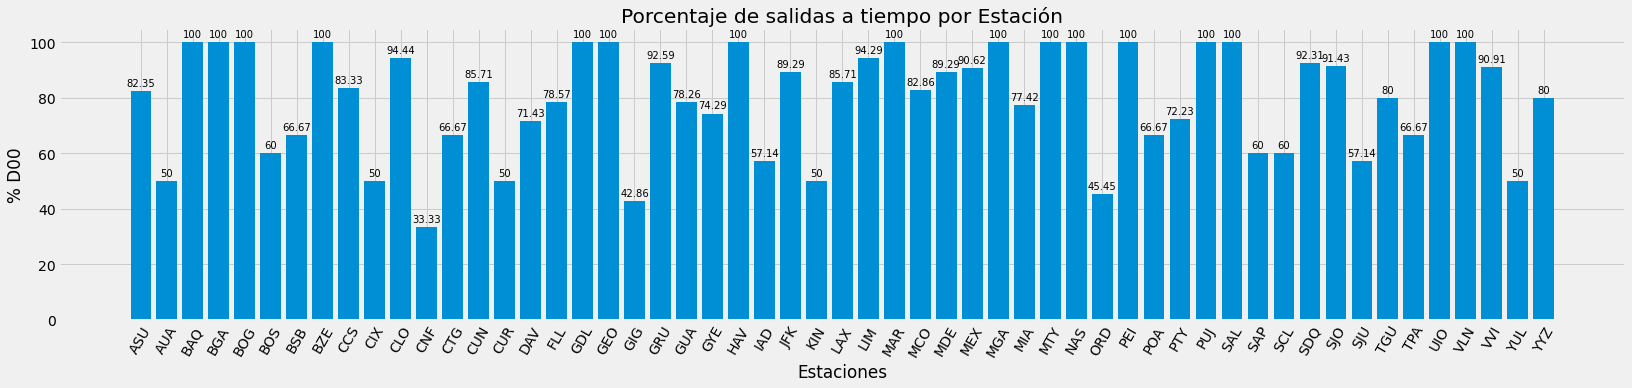

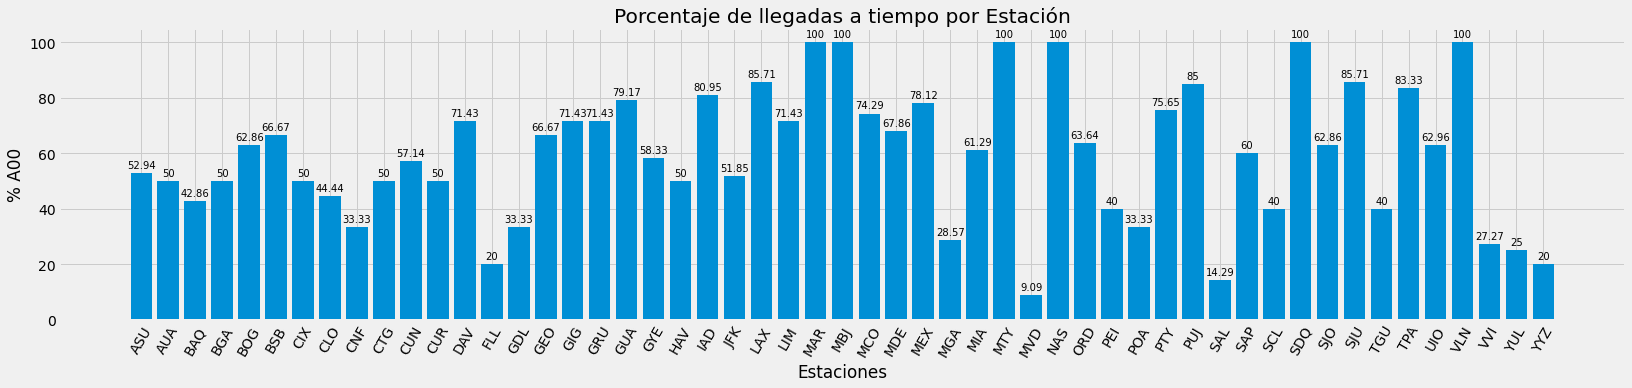

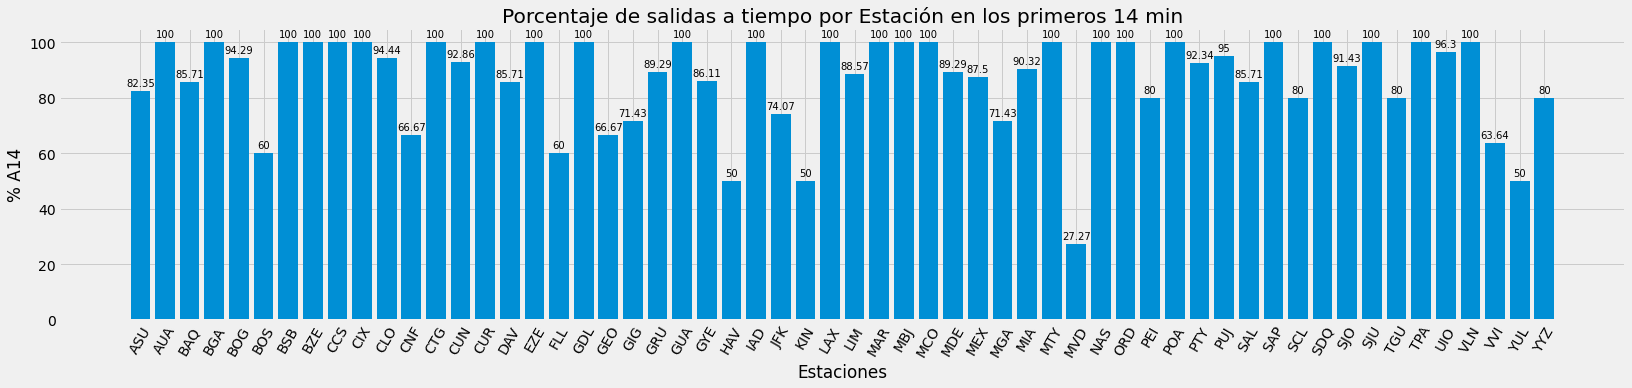

In [7]:
plt.style.use('fivethirtyeight')
#D00
fig, ax = plt.subplots(figsize= (25,5))
plt.xticks(rotation=60)
re1 = ax.bar(punt_est_orig_d00['ORIG_CD'], punt_est_orig_d00['ON TIME %'])
ax.bar_label(re1, padding=3, fontsize = '10')
ax.set(title='Porcentaje de salidas a tiempo por Estación', ylabel= '% D00', xlabel= 'Estaciones');
plt.show()

#A00
fig, ax = plt.subplots(figsize= (25,5))
plt.xticks(rotation=60)
re2 = ax.bar(punt_est_dest_a00['DEST_CD'], punt_est_dest_a00['ON TIME %'])
ax.bar_label(re2, padding=3, fontsize = '10')
ax.set(title='Porcentaje de llegadas a tiempo por Estación', ylabel= '% A00', xlabel= 'Estaciones');
plt.show()

#A14
fig, ax = plt.subplots(figsize= (25,5))
plt.xticks(rotation=60)
re3 = ax.bar(punt_est_dest_a14['DEST_CD'], punt_est_dest_a14['ON TIME %'])
ax.bar_label(re3, padding=3, fontsize = '10')
ax.set(title='Porcentaje de salidas a tiempo por Estación en los primeros 14 min', ylabel= '% A14', xlabel= 'Estaciones');
plt.show()

<a id='Respuesta2C'></a>
### Respuesta 2C

Dado que no se especifica que esta evaluacion por periodos semanales se evaluara todo el dataset

[Volver al inidice](#indice)

In [8]:
# Vuelos cancelados en la totalidad del dataset
canceled_flts = df.groupby('FLT_TYPE')[['FLT_NUM','SCH_DEST_CD']]
cancellations = canceled_flts.get_group('Cancellations')
print('Se registraron ',len(cancellations),' vuelos cancelados.')
cancellations.reset_index(drop=True)

Se registraron  2  vuelos cancelados.


,FLT_NUM,SCH_DEST_CD
0,239,PTY
1,724,PTY


<a id='Respuesta2D'></a>
### Respuesta 2D

Mismas consideraciones que en la evaluacion de 2C

[Volver al inidice](#indice)

In [9]:
# Vuelos desviados en la totalidad del dataset
diverted_flts = df.groupby('FLT_TYPE')[['FLT_NUM','DEST_CD','SCH_DEST_CD']]
diversions = diverted_flts.get_group('Diversion')
print('Se registraron ',len(diversions),' desviaciones.')
diversions.reset_index(drop=True)

Se registraron  4  desviaciones.


,FLT_NUM,DEST_CD,SCH_DEST_CD
0,341,FLL,MIA
1,152,GYE,UIO
2,283,ASU,MVD
3,804,MIA,JFK


<a id='Respuesta2E'></a>
### Respuesta 2E

[Volver al inidice](#indice)

In [10]:
# Se define la estacion a evaluar
station = 'MIA'

#Encontramos el primer par llegada - salida
station_query_dest = df.query(f'(DEST_CD == "{station}")')
station_query_dest = station_query_dest.sort_values(by=["ON_DTMZ"])
first_pair_dpt = station_query_dest['OFF_DTMZ'].iloc[0]

#Generamos df para calculo de tiempo en MIA
station_analysis_df = df.query(f'((ORIG_CD == "{station}") or (DEST_CD == "{station}"))')
station_analysis_df = station_analysis_df[station_analysis_df['OFF_DTMZ'] > first_pair_dpt]
station_analysis_df = station_analysis_df[station_analysis_df['FLT_TYPE'] == 'Schedule']
station_analysis_df.dropna(inplace = True)

#Damos formato timestamp a las columnas de llegada y salida
station_analysis_df['OFF_DTMZ'] = pd.to_datetime(station_analysis_df['OFF_DTMZ'])
station_analysis_df['ON_DTMZ'] = pd.to_datetime(station_analysis_df['ON_DTMZ'])

time_on_station = {}

#Conseguimos deltas de cada avion
for tail in station_analysis_df['TAIL'].unique():
    time_on_station[tail] = [0] #Añadiendo llaves al diccionario
    
    tail_df = station_analysis_df[station_analysis_df["TAIL"] == tail]
    tail_df.sort_values(by = ['ON_DTMZ'], inplace= True)
    
    if tail_df['DEST_CD'].str.contains(station).any():
        on = tail_df.loc[tail_df['DEST_CD'] == station] #Primera llegada a MIA
        on.reset_index(drop= True, inplace= True)
        
        while True:
            try:
                off = tail_df.loc[tail_df['OFF_DTMZ'] > on['ON_DTMZ'][0]] #Primera salida, despues de la primera llegada
                off.reset_index(drop = True, inplace= True)
                delta = off['OFF_DTMZ'][0] - on["ON_DTMZ"][0]
                time_on_station[tail].append(delta)
                on = off
            except:
                break
        
# El delta de cada avion debe filtrarse, hay un par de resultados erroneos en la salida que se descartan con facilidad
# No es un problema mayor ahora, puede solucionarse reescribiendo un poco el codigo dentro del try

#Creamos el dataframe
on_earth_df = pd.DataFrame(columns = ['Tail','min','mean','max','total'])

#Los deltas correctos para cada vuelo se optienen a partir del slicing [1::2] de cada lista
for i in time_on_station:
    time_on_station[i] = time_on_station[i][1::2]
    
    #Completamos df5
    mean_time = pd.Series(time_on_station[i]).mean()
    total_time = sum(time_on_station[i], datetime.timedelta())
    
    try:
        min_time = min(time_on_station[i])
        max_time = max(time_on_station[i])

    except:
        min_time = 0
        max_time = 0

    
    on_earth_df = on_earth_df.append({'Tail':i,'min':min_time,'mean':mean_time,'max':max_time, 'total':total_time}, ignore_index = True)

on_earth_df.dropna(inplace= True)
on_earth_df

,Tail,min,mean,max,total
0,HP1535,0 days 02:48:00,0 days 07:22:24,0 days 10:04:00,1 days 12:52:00
1,HP9904,0 days 12:25:00,0 days 12:25:00,0 days 12:25:00,0 days 12:25:00
2,HP1726,0 days 02:33:00,0 days 06:46:00,0 days 10:59:00,0 days 13:32:00
3,HP9902,0 days 02:51:00,0 days 06:50:30,0 days 10:50:00,0 days 13:41:00
4,HP1723,0 days 07:47:00,0 days 09:33:15,0 days 10:37:00,1 days 14:13:00
5,HP1851,0 days 07:03:00,0 days 08:52:00,0 days 10:41:00,0 days 17:44:00
6,HP1856,0 days 03:56:00,0 days 07:58:40,0 days 10:08:00,0 days 23:56:00
7,HP1729,0 days 07:00:00,0 days 07:00:00,0 days 07:00:00,0 days 07:00:00
8,HP1823,0 days 04:11:00,0 days 05:34:30,0 days 06:58:00,0 days 11:09:00
9,HP1854,0 days 04:13:00,0 days 04:19:00,0 days 04:23:00,0 days 12:57:00


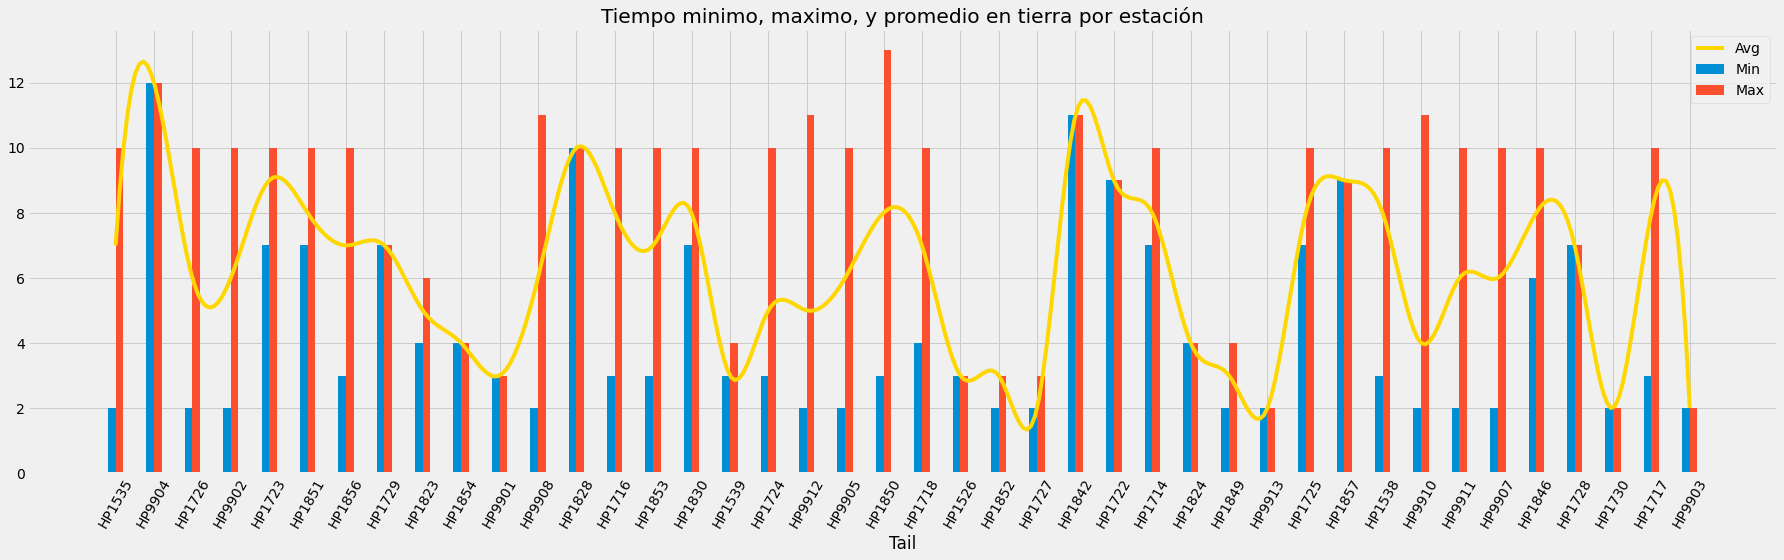

In [11]:
fig, ax = plt.subplots(figsize= (25,8))
width = 0.20
labels = on_earth_df['Tail']
x = np.arange(len(labels))

rects1 = ax.bar(x-0.1, on_earth_df['min'].astype('timedelta64[h]'), width)
rects2 = ax.bar(x+0.1, on_earth_df['max'].astype('timedelta64[h]'), width)

x_new = np.linspace(0,len(labels)-1,400)
y = on_earth_df['mean'].astype('timedelta64[h]')
bspline = interpolate.make_interp_spline(x, y)
y_new = bspline(x_new)

ax.plot(x_new, y_new, color = 'gold')

plt.xticks(x, labels, rotation=60)
ax.legend(['Avg','Min','Max'])

ax.set_title('Tiempo minimo, maximo, y promedio en tierra por estación')
ax.set_xlabel('Tail')
fig.tight_layout()

plt.show()

<a id='Respuesta2F'></a>
### Respuesta 2F

[Volver al inidice](#indice)

In [12]:
df_top_2 = df.drop(df.loc[df['ORIG_CD']=='PTY'].index)
df_top_2 = df.groupby(['ORIG_CD','STATUS D00']).agg({'AIRLINE':'count'})
df_top_2.rename(columns={'AIRLINE': 'COUNT'}, inplace=True)
total = df_top_2.groupby(level=0).COUNT.transform('sum')
df_top_2['PERCENTAGE'] = df_top_2.groupby(level=0).COUNT.transform(lambda x: ((x/total)*100).round(2))

# Debido a que varias estaciones presentan un indice de puntualidad (ON TIME) de 100% (perfecto) para D00 en el dataset le 
# damos mayor peso para la consideracion del top 2 a aquellas que tienen la mayor cantidad de vuelos registrados.

top_perc = df_top_2.nlargest(10, ['PERCENTAGE'])
top_cnt_perc = top_perc.nlargest(2, ['COUNT'])
top_cnt_perc.reset_index()

,ORIG_CD,STATUS D00,COUNT,PERCENTAGE
0,BOG,ON TIME,60,100.0
1,BAQ,ON TIME,12,100.0


In [13]:
df_low_2 = df_top_2
df_low_temp = df_low_2.rename_axis(['ORIG_CD','STATUS D00']).reset_index()
df_low_temp = df_low_temp[df_low_temp['STATUS D00'] != 'CANCELED']
bott_perc = df_low_temp[df_low_temp['STATUS D00'] == 'ON TIME'] 
bott_perc = bott_perc.nsmallest(2, 'PERCENTAGE').reset_index(drop=True)

bott_perc

,ORIG_CD,STATUS D00,COUNT,PERCENTAGE
0,MVD,ON TIME,4,19.05
1,MBJ,ON TIME,1,25.00


<a id='Respuesta2G'></a>
### Respuesta 2G

[Volver al inidice](#indice)

In [14]:
# Retrasos en la llegada A00

late_buckets_pty_a00 = df.loc[df['DEST_CD'] == 'PTY']
late_buckets_pty_a00 = late_buckets_pty_a00.loc[late_buckets_pty_a00['STATUS A00'] == 'DELAYED']
pty_late_hours_a00 = pd.to_datetime(late_buckets_pty_a00['STA'], format='%H:%M')  - datetime.timedelta(hours = 5)
hours_a00 = pty_late_hours_a00.dt.hour

# Retrasos en la llegada A14

late_buckets_pty_a14 = df.loc[df['DEST_CD'] == 'PTY']
late_buckets_pty_a14 = late_buckets_pty_a14.loc[late_buckets_pty_a14['STATUS A14'] == 'DELAYED']
pty_late_hours_a14 = pd.to_datetime(late_buckets_pty_a14['STA'], format='%H:%M')  - datetime.timedelta(hours = 5)
hours_a14 = pty_late_hours_a14.dt.hour

# Retrasos en la salida D00

late_buckets_pty_d00 = df.loc[df['ORIG_CD'] == 'PTY']
late_buckets_pty_d00 = late_buckets_pty_d00.loc[late_buckets_pty_d00['STATUS D00'] == 'DELAYED']
pty_late_hours_d00 = pd.to_datetime(late_buckets_pty_d00['STD'], format='%H:%M')  - datetime.timedelta(hours = 5)
hours_d00 = pty_late_hours_d00.dt.hour

# Resultados

buckets_a00 = dict(hours_a00.groupby(hours_a00).count())
buckets_a14 = dict(hours_a14.groupby(hours_a14).count())
buckets_d00 = dict(hours_d00.groupby(hours_d00).count())

for i in range(24):
    if i in buckets_a00.keys():
        buckets_a00
    else:
        buckets_a00[i] = 0
    
    if i in buckets_a14.keys():
        buckets_a14
    else:
        buckets_a14[i] = 0
    
    if i in buckets_d00.keys():
        buckets_d00
    else:
        buckets_d00[i] = 0

# Resultados_limpio
        
result_pty_a00 = dict(sorted(buckets_a00.items()))
result_pty_a14 = dict(sorted(buckets_a14.items()))
result_pty_d00 = dict(sorted(buckets_d00.items()))

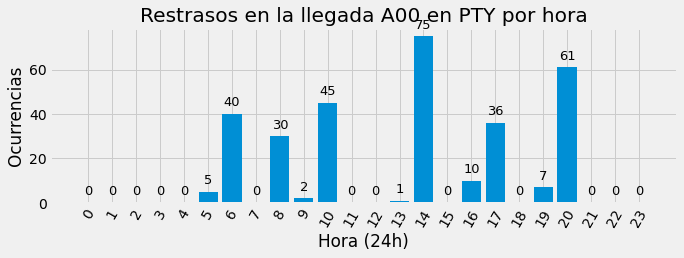

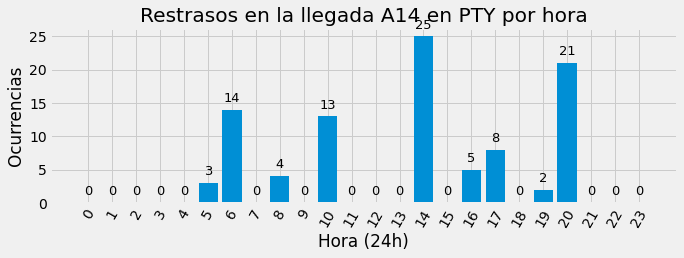

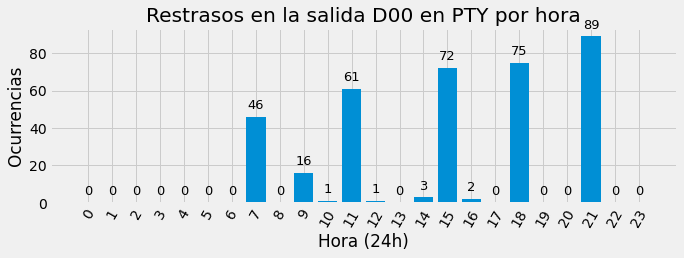

In [15]:
fig, ax = plt.subplots(figsize= (10,3))
plt.xticks(rotation=60)
re1 = ax.bar(buckets_a00.keys(), buckets_a00.values())
ax.set_xticks(np.arange(24))
ax.bar_label(re1, padding=5, fontsize = '13')
ax.set(title='Restrasos en la llegada A00 en PTY por hora', ylabel= 'Ocurrencias', xlabel= 'Hora (24h)');
plt.show()

fig, ax = plt.subplots(figsize= (10,3))
plt.xticks(rotation=60)
re2 = ax.bar(buckets_a14.keys(), buckets_a14.values())
ax.set_xticks(np.arange(24))
ax.bar_label(re2, padding=5, fontsize = '13')
ax.set(title='Restrasos en la llegada A14 en PTY por hora', ylabel= 'Ocurrencias', xlabel= 'Hora (24h)');
plt.show()

fig, ax = plt.subplots(figsize= (10,3))
plt.xticks(rotation=60)
re3 = ax.bar(buckets_d00.keys(), buckets_d00.values())
ax.set_xticks(np.arange(24))
ax.bar_label(re3, padding=5, fontsize = '13')
ax.set(title='Restrasos en la salida D00 en PTY por hora', ylabel= 'Ocurrencias', xlabel= 'Hora (24h)');
plt.show()

Del analisis realizado se pueden hacer las siguientes observaciones en relacion a la estacion PTY:

    Hora con mayor cantidad de retrasos a la llegada A00: 14h (2:00 pm) 75 ocurrencias.
    Hora con mayor cantidad de retrasos a la llegada A14: 14h (2:00 pm) 25 ocurrencias.
    Hora con mayor cantidad de retrasos a la llegada A00: 21h (9:00 pm) 89 ocurrencias.

<a id='Respuesta2H'></a>
### Respuesta 2H

[Volver al inidice](#indice)

In [16]:
# Llegadas
llegadas_pty = df.loc[df['DEST_CD'] == 'PTY']
llegadas_pty = pd.to_datetime(llegadas_pty['STA'], format='%H:%M') - datetime.timedelta(hours = 5)
hours_llegada = llegadas_pty.dt.hour

# Salidas
salidas_pty = df.loc[df['ORIG_CD'] == 'PTY']
salidas_pty = pd.to_datetime(salidas_pty['STD'], format='%H:%M') - datetime.timedelta(hours = 5)
hours_salidas = salidas_pty.dt.hour

llegadas_unsort = dict(hours_llegada.groupby(hours_llegada).count())
salidas_unsort = dict(hours_salidas.groupby(hours_salidas).count())

for i in range(24):
    if i in llegadas_unsort.keys():
        llegadas_unsort
    else:
        llegadas_unsort[i] = 0
    
    if i in salidas_unsort.keys():
        salidas_unsort
    else:
        salidas_unsort[i] = 0

# Resultados
resultados_llegadas = dict(sorted(llegadas_unsort.items()))
resultados_salidas = dict(sorted(salidas_unsort.items()))

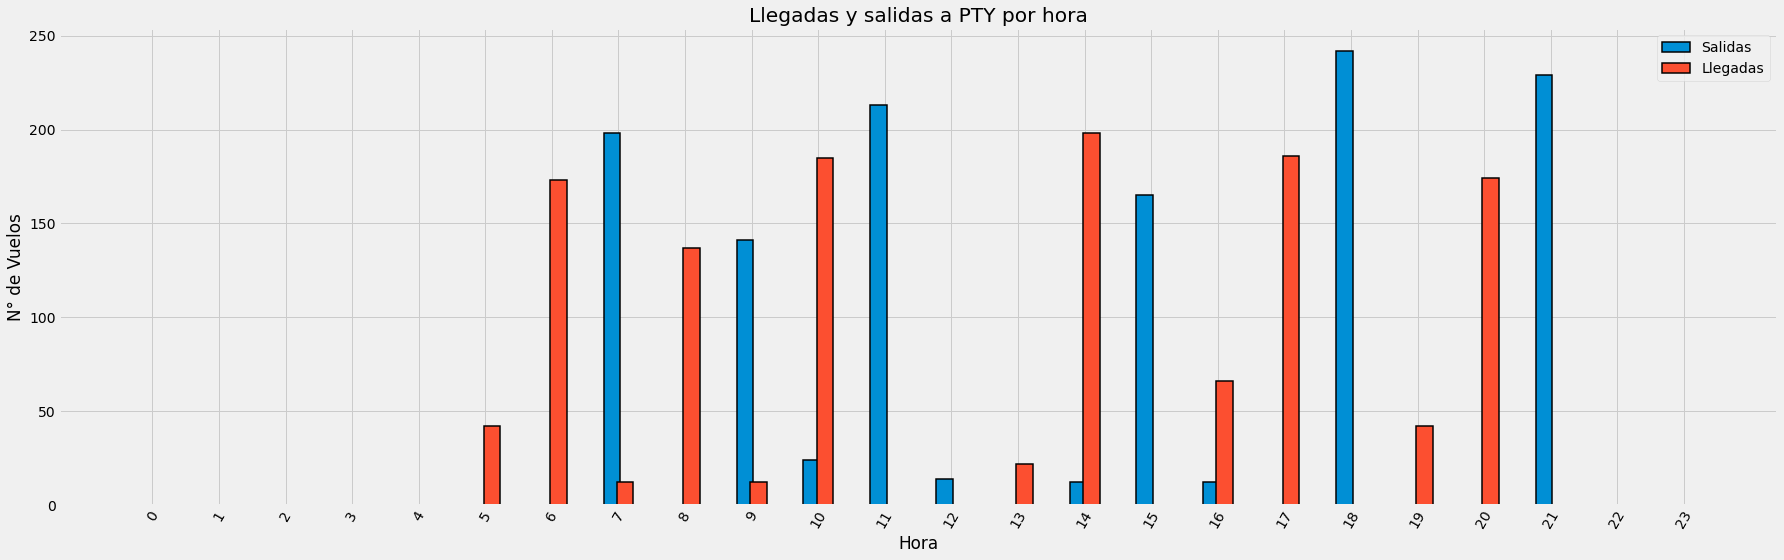

In [17]:
fig, ax = plt.subplots(figsize = (25,8))
width = 0.25
labels = np.arange(24)
x = np.arange(24)
legend_plot = ['Salidas','Llegadas']
ax.bar(labels - 0.1, resultados_salidas.values(), width, edgecolor='black', linewidth=1.5)
ax.bar(labels + 0.1, resultados_llegadas.values(), width, edgecolor='black', linewidth=1.5)
plt.legend(legend_plot)
plt.xticks(x, labels, rotation=60);

ax.set_title('Llegadas y salidas a PTY por hora')
ax.set_xlabel('Hora')
ax.set_ylabel('N° de Vuelos')
fig.tight_layout()

plt.show()

Un analisis visual del grafico nos permite identificar rapidamente los bancos de operacion como los periodos del dia
donde se agrupan barras rojas y azules con valores altos, es decir llegadas y salidas, de esto podemos determinar los
siguientes bancos de operacion:
    
    06:00 - 07:00
    08:00 - 09:00
    10:00 - 11:00
    14:00 - 15:00
    17:00 - 18:00
    20:00 - 21:00

Se puede deducir por tanto que se trabajan **6** bancos de operacion en los periodos ya indicados.

<a id='Respuesta2I'></a>
### Respuesta 2I

[Volver al inidice](#indice)

In [18]:
in_out_df = df.dropna().reset_index()
in_out_df[['OUT_DTMZ','OFF_DTMZ','ON_DTMZ','IN_DTMZ']] = df[['OUT_DTMZ','OFF_DTMZ','ON_DTMZ','IN_DTMZ']].apply(pd.to_datetime, errors='coerce')

In [19]:
in_out_df['OUT-OFF DELTA'] = in_out_df['OFF_DTMZ'] - in_out_df['OUT_DTMZ']
in_out_df['ON-IN DELTA'] = in_out_df['IN_DTMZ'] - in_out_df['ON_DTMZ']
deltas_df = in_out_df[['ORIG_CD','DEST_CD','OUT-OFF DELTA','ON-IN DELTA']]

# Realizamos los calculos para los deltas del taxing de salidas OUT-OFF

delta_out_by_station = deltas_df.groupby('ORIG_CD').agg({'OUT-OFF DELTA':[('Delta Max','max'),('Delta Min','min'),
                                                                        ('Desviacion Estandar', lambda x: x.std()),
                                                                        ('Percentil 80',lambda x2: x2.quantile(q=0.8))]})

# Ahora los calculos para los deltas del taxing de llegadas ON-IN

delta_in_by_station = deltas_df.groupby('ORIG_CD').agg({'ON-IN DELTA':[('Delta Max','max'),('Delta Min','min'),
                                                                        ('Desviacion Estandar', lambda x: x.std()),
                                                                        ('Percentil 80',lambda x2: x2.quantile(q=0.8))]})
delta_out_by_station

OUT-OFF DELTA                                            \
              Delta Max       Delta Min       Desviacion Estandar   
ORIG_CD                                                             
ASU     0 days 00:27:00 0 days 00:13:00 0 days 00:03:25.577004457   
AUA     0 days 00:17:00 0 days 00:13:00 0 days 00:01:53.578166916   
BAQ     0 days 00:32:00 0 days 00:10:00 0 days 00:05:37.800371386   
BGA     0 days 00:19:00 0 days 00:09:00 0 days 00:05:07.896086366   
BOG     0 days 00:26:00 0 days 00:11:00 0 days 00:03:25.035755459   
BOS     0 days 00:17:00 0 days 00:12:00 0 days 00:02:01.860576069   
BSB     0 days 00:17:00 0 days 00:12:00 0 days 00:02:22.828568570   
BZE     0 days 00:14:00 0 days 00:14:00                       NaT   
CCS     0 days 00:27:00 0 days 00:09:00 0 days 00:05:16.480647117   
CIX     0 days 00:18:00 0 days 00:17:00 0 days 00:00:34.641016151   
CLO     0 days 00:30:00 0 days 00:11:00 0 days 00:03:42.037485937   
CNF     0 days 00:23:00 0 days 00:12:00 0 days 00:05:10.032256386   
CTG     0 days 00:21:00 0 days 00:15:00 0 days 00:01:49.544511501   
CUN     0 days 00:27:00 0 days 00:09:00 0 days 00:03:51.663152765   
CUR     0 days 00:17:00 0 days 00:13:00 0 days 00:01:42.469507659   
DAV     0 days 00:45:00 0 days 00:09:00 0 days 00:09:31.409739949   
EZE     0 days 00:37:00 0 days 00:13:00 0 days 00:16:58.233764908   
FLL     0 days 00:56:00 0 days 00:12:00 0 days 00:08:32.175666196   
GDL     0 days 00:17:00 0 days 00:13:00 0 days 00:01:52.249721603   
GEO     0 days 00:19:00 0 days 00:15:00 0 days 00:02:03.693168768   
GIG     0 days 00:22:00 0 days 00:11:00 0 days 00:03:22.192527512   
GRU     0 days 00:29:00 0 days 00:10:00 0 days 00:04:26.122324471   
GUA     0 days 00:37:00 0 days 00:10:00 0 days 00:06:02.588256707   
GYE     0 days 00:29:00 0 days 00:09:00 0 days 00:04:16.665052456   
HAV     0 days 00:24:00 0 days 00:08:00 0 days 00:06:50.974451760   
IAD     0 days 00:36:00 0 days 00:10:00 0 days 00:05:10.759438426   
JFK     0 days 00:28:00 0 days 00:10:00 0 days 00:03:51.025696277   
KIN     0 days 00:16:00 0 days 00:11:00 0 days 00:02:38.745078663   
LAX     0 days 00:31:00 0 days 00:11:00 0 days 00:04:55.380010578   
LIM     0 days 00:40:00 0 days 00:10:00 0 days 00:06:46.019119529   
MAR     0 days 00:25:00 0 days 00:12:00 0 days 00:04:55.770181052   
MBJ     0 days 00:28:00 0 days 00:16:00 0 days 00:05:26.802692767   
MCO     0 days 01:01:00 0 days 00:10:00 0 days 00:07:34.712322593   
MDE     0 days 01:26:00 0 days 00:09:00 0 days 00:11:22.606082473   
MEX     0 days 00:40:00 0 days 00:09:00 0 days 00:05:13.109782423   
MGA     0 days 00:34:00 0 days 00:13:00 0 days 00:06:41.372644807   
MIA     0 days 01:01:00 0 days 00:09:00 0 days 00:06:21.891195584   
MTY     0 days 00:22:00 0 days 00:15:00 0 days 00:03:24.205778566   
MVD     0 days 00:29:00 0 days 00:08:00 0 days 00:04:22.613240880   
NAS     0 days 00:32:00 0 days 00:10:00 0 days 00:09:19.642743185   
ORD     0 days 00:27:00 0 days 00:10:00 0 days 00:03:40.239104515   
PEI     0 days 00:21:00 0 days 00:10:00           0 days 00:03:50   
POA     0 days 00:31:00 0 days 00:12:00 0 days 00:08:15.862884273   
PTY     0 days 00:51:00 0 days 00:07:00 0 days 00:04:49.794437594   
PUJ     0 days 00:43:00 0 days 00:12:00 0 days 00:07:43.226304980   
SAL     0 days 00:20:00 0 days 00:10:00 0 days 00:02:46.460478519   
SAP     0 days 00:22:00 0 days 00:11:00 0 days 00:03:40.454076850   
SCL     0 days 00:24:00 0 days 00:13:00 0 days 00:03:43.383079036   
SDQ     0 days 00:20:00 0 days 00:12:00 0 days 00:02:40.769254668   
SJO     0 days 00:27:00 0 days 00:09:00 0 days 00:03:59.824599845   
SJU     0 days 00:24:00 0 days 00:12:00 0 days 00:02:58.095990460   
TGU     0 days 00:19:00 0 days 00:12:00 0 days 00:02:55.214154679   
TPA     0 days 00:24:00 0 days 00:14:00 0 days 00:02:54.355957741   
UIO     0 days 00:34:00 0 days 00:10:00 0 days 00:05:32.972588482   
VLN     0 days 00:17:00 0 days 00:13:00 0 days 00:02:18.564064605   
VVI     

In [ ]:
delta_in_by_station

<a id='Respuesta3'></a>
### Respuesta 3

**1 - Renovación de la flota**: Copa Airlines inició la renovación de la flota a principios del año 2000, adquiriendo nuevas aeronaves más eficientes en el uso de combustible.

**2 - Winglets**: Uso de “winglets” (aletas de punta de ala), los cuales reducen la resistencia aerodinámica y mejoran el desempeño de la aeronave, reduciendo el consumo de combustible.

**3 - RNAV (navegación satelital)**: La navegación satelital nos permite utilizar las rutas más directas en varios de nuestros destinos, disminuyendo el consumo de combustible.

**4 - Practicas de eficiencia operacional que disminuyen el consumo por hora de vuelo**:

    -Optimización de los niveles de vuelo y velocidad en las distintas etapas de la operación.
    -Optimización en los despegues y aterrizajes.
    -Remolque entre hangar y puertas de embarque, y rodaje con un solo motor en aeropuertos.
    -Mejora en el sistema de planificación de vuelos y en la asignación de flota para las diferentes rutas, optimizando el uso de las aeronaves.
    -Reducción de uso APU en aeropuertos con GPU.
    
**5 - Mantenimiento de aeronaves**:

    -Programa de lavado de motores y de pulimento de superficies de vuelo.
    -Estudios de escapes de presión en cabinas.
    -Cierre rápido de CDLs (Configuration Deviation List) que afecten el consumo del avión.
    -Reducción de peso abordo.
    
Copa cumple con todas las iniciativas anteriores pues directamente estas son listadas por la misma compañia entre sus
acciones en favor del medio ambiente, cabe destacar como acciones con fines medio ambientales tambien favorecen positivamente
la optimizacion economica de la compañia, esto es debido a que el consumo de combustible es la problematica principal en ambos
casos.

[Volver al inidice](#indice)

<a id='Respuesta4A'></a>
### Respuesta 4A

[Volver al inidice](#indice)

In [ ]:
x = int(input('Introduzca un numero: '))

if x % 2 == 0:
    print(f'El numero {x} es divisible por 2 (par)')
else:
    print(f'El numero {x} no es divisible por 2 (impar)')

<a id='Respuesta4B'></a>
### Respuesta 4B

[Volver al inidice](#indice)

In [ ]:
pd.set_option('display.max_rows',None)
def fib_to(n):
    fibs = [0, 1]
    for i in range(2, n+1):
        fibs.append(fibs[-1] + fibs[-2])
    return fibs
fib_series = pd.Series(fib_to(100))
fib_series